In [ ]:
from py2neo import Graph, Node, Relationship
import pandas as pd

# загрузка данных из таблицы
data = pd.read_csv("data_test.csv", delimiter=";")

# установка подключения к Neo4j
graph = Graph("bolt://localhost:7687", auth=("neo4j", "password"))

# создание узлов и отношений в Neo4j
for index, row in data.iterrows():
    event = Node("Event", id=row["id события"])
    person1 = Node("Person", name=row["ФИО участника события 1"])
    person2 = Node("Person", name=row["ФИО участника события 2"])

    event_person1 = Relationship(event, "PARTICIPATED_IN", person1)
    event_person2 = Relationship(event, "PARTICIPATED_IN", person2)

    graph.create(event_person1)
    graph.create(event_person2)

In [8]:
from neo4j import GraphDatabase
#import community as community_louvain
import community

In [9]:
import networkx as nx
from py2neo import Graph
from community import best_partition

# create a connection to the graph database
graph = Graph("bolt://localhost:7687", auth=("neo4j", "password"))

# retrieve all nodes and relationships of interest
result = graph.run("""
    MATCH (p:Person)<-[:PARTICIPATED_IN]->(e:Event)
    RETURN p, e
""")

# create a NetworkX graph and add nodes and edges
G = nx.Graph()
for record in result:
    G.add_edge(record["p"]["name"], record["e"]["id"])

# apply Louvain's algorithm
partition = community.best_partition(G)

# print the results
for node, community_id in partition.items():
    print(f"Node {node} belongs to community {community_id}")

Node Белоновская Анастасия Семеновна belongs to community 0
Node 189 belongs to community 0
Node Галчевская Карина Владимировна belongs to community 0
Node Сапожник Борис Валерьевич belongs to community 1
Node 206 belongs to community 1
Node Офицеров Олег Романович belongs to community 1
Node Чемодуров Дамир Русланович belongs to community 2
Node 445 belongs to community 2
Node Жандарова Лариса Германовна belongs to community 2
Node Мингажетдинов Рамиль Семенович belongs to community 3
Node 503 belongs to community 3
Node Масимова Яна Дамировна belongs to community 3
Node Щербатенко Ольга Робертовна belongs to community 4
Node 571 belongs to community 4
Node Мухтарова Алена Яковлевна belongs to community 4
Node Федутинов Артем Артурович belongs to community 5
Node 595 belongs to community 5
Node Русских Кира Константиновна belongs to community 5
Node Маргиев Григорий Иванович belongs to community 6
Node 637 belongs to community 6
Node Федонкина Кристина Маратовна belongs to community 6

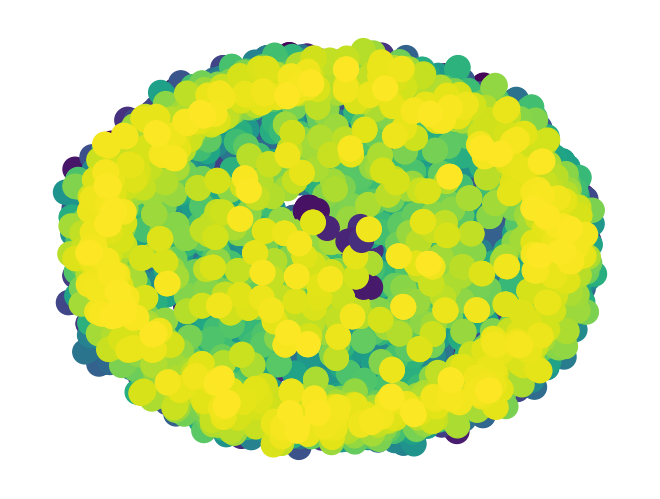

In [11]:
import matplotlib.pyplot as plt

# create a layout for the graph
pos = nx.spring_layout(G)

# assign a color to each community
colors = [partition[node] for node in G.nodes()]

# draw the graph with nodes colored by community
nx.draw(G, pos, node_color=colors, with_labels=False)

# show the plot
plt.show()